# Import statements

In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb 
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from xgboost import plot_importance
import scipy
from scipy.stats import pearsonr
import skopt
import sklearn

# Load data

In [104]:
data = pd.read_csv("ntd_table.csv", sep='\t')
#to view the loaded data
data
#To get the number of rows and columns
data.shape

(45220, 16)

In [105]:
# Prepare Data
Y = data.iloc[:,-1]
X = data.iloc[:, 1:15]
#to view the spiltting 
X

,Length,GC Content,GC Skew_Stdev,GC Skew_median,GC Skew_mean,GC Position 1,GC Position 2,GC Postion 3,Melting temperature,Molecular weight,Entropy,Zlib compression ratio,CAI,Intergenic region
0,396,44.191919,0.123351,0.170290,0.133493,55.303030,36.363636,40.909091,79.408282,122886.4961,5.866457,0.447552,0.197978,247
1,396,44.191919,0.123351,0.170290,0.133493,55.303030,36.363636,40.909091,79.408282,122886.4961,5.866457,0.447552,0.197978,131
2,1143,42.957130,0.233937,0.116883,0.081073,48.818898,39.895013,40.157480,79.163389,353481.5123,6.934628,0.368197,0.215192,1142
3,651,45.007680,0.123106,0.227273,0.208360,50.691244,42.857143,41.474654,80.001978,202544.3158,6.367186,0.402047,0.190523,208
4,777,34.877735,0.147628,0.320574,0.319266,38.223938,29.343629,37.065637,75.591492,241883.9497,6.539303,0.382716,0.205294,895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45215,2643,36.360197,0.185318,0.125000,0.157952,41.997730,34.279228,32.803632,76.906870,819468.4661,7.763098,0.332212,0.185867,18263
45216,444,40.315315,0.179418,0.100000,0.041099,52.027027,31.756757,37.162162,77.592156,137251.7441,5.978426,0.440252,0.233469,0
45217,1764,41.213152,0.179125,0.103833,0.085499,45.578231,44.047619,34.013605,78.791894,546423.3003,7.358203,0.348915,0.159023,272
45218,312,41.666667,0.407731,0.198439,0.325410,52.884615,34.615385,37.500000,77.363064,96725.7946,5.630104,0.481159,0.225985,72


In [26]:
scipy.stats.pearsonr(data['Length'],data['Molecular weight'])

(0.9999790394044235, 0.0)

In [27]:
scipy.stats.pearsonr(data['Length'],data['Melting temperature'])

(0.16722699063661817, 7.114311411293348e-281)

In [28]:
scipy.stats.pearsonr(data['Entropy'],data['GC Content'])

(-0.10977156516866324, 3.1467848784331784e-121)

In [29]:
scipy.stats.pearsonr(data['Length'],data['Entropy'])

(0.8310570198430475, 0.0)

In [30]:
scipy.stats.pearsonr(data['Length'],data['GC Content'])

(-0.06293864713561007, 6.311615833524462e-41)

In [31]:
scipy.stats.pearsonr(data['GC Content'],data['Melting temperature'])

(0.9258610153092581, 0.0)

In [12]:
scipy.stats.pearsonr(data['Length'],data['Intergenic region'])

(0.4037768256149038, 0.0)

In [13]:
scipy.stats.pearsonr(data['Molecular weight'],data['GC Content'])

(-0.06296898004065557, 5.784746414909375e-41)

In [14]:
scipy.stats.pearsonr(data['Entropy'],data['Molecular weight'])

(0.831029772712627, 0.0)

In [18]:
scipy.stats.pearsonr(data['GC Content'],data['CAI'])

(-0.03299883638166419, 2.235926129841803e-12)

In [16]:
scipy.stats.pearsonr(data['CAI'],data['Length'])

(-0.0219170984404549, 3.1452259819332343e-06)

In [19]:
scipy.stats.pearsonr(data['CAI'],data['Intergenic region'])

(-0.009810249683541345, 0.036965798102476716)

In [20]:
scipy.stats.pearsonr(data['CAI'],data['Molecular weight'])

(-0.022323940056752825, 2.057988027850407e-06)

In [23]:
scipy.stats.pearsonr(data['GC Content'],data['GC Skew_Stdev'])

(-0.07263947259196055, 5.813711545116708e-54)

In [54]:
scipy.stats.pearsonr(data['Melting temperature'],data['Molecular weight'])

(0.16711076737035577, 1.7577085517339071e-280)

In [60]:
scipy.stats.pearsonr(data['GC Content'],data['GC Postion 3'])

(0.7256530052356985, 0.0)

In [62]:
scipy.stats.pearsonr(data['GC Content'],data['GC Position 2'])

(0.7098949015668433, 0.0)

In [63]:
scipy.stats.pearsonr(data['GC Content'],data['GC Position 1'])

(0.5799543221524908, 0.0)

In [64]:
scipy.stats.pearsonr(data['GC Content'],data['GC Skew_median'])

(-0.09398304405604668, 3.0604966285641983e-89)

In [65]:
scipy.stats.pearsonr(data['GC Content'],data['GC Skew_mean'])

(-0.08785575865216959, 3.5179200941756794e-78)

In [66]:
scipy.stats.pearsonr(data['GC Skew_mean'],data['GC Skew_Stdev'])

(-0.08188810240932046, 3.937787062623953e-68)

In [67]:
scipy.stats.pearsonr(data['GC Skew_median'],data['GC Skew_Stdev'])

(-0.06931503466398402, 2.7660107915535896e-49)

In [68]:
scipy.stats.pearsonr(data['GC Content'],data['Zlib compression ratio'])

(0.1125714157539141, 1.9856032184971123e-127)

In [69]:
scipy.stats.pearsonr(data['Length'],data['Zlib compression ratio'])

(-0.6852685087094584, 0.0)

In [70]:
scipy.stats.pearsonr(data['Intergenic region'],data['Zlib compression ratio'])

(-0.30160922299692544, 0.0)

# XGBoost

In [106]:
#train and test data split up to 80% training and 20% test data
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [29]:
#build classifier
model = XGBClassifier()
model.fit(X_train, y_train)

/home/shriprabha/anaconda3/envs/ML_env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[13:30:02] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [7]:
#predictions and accuracy
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]


# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.43%


# Visualization

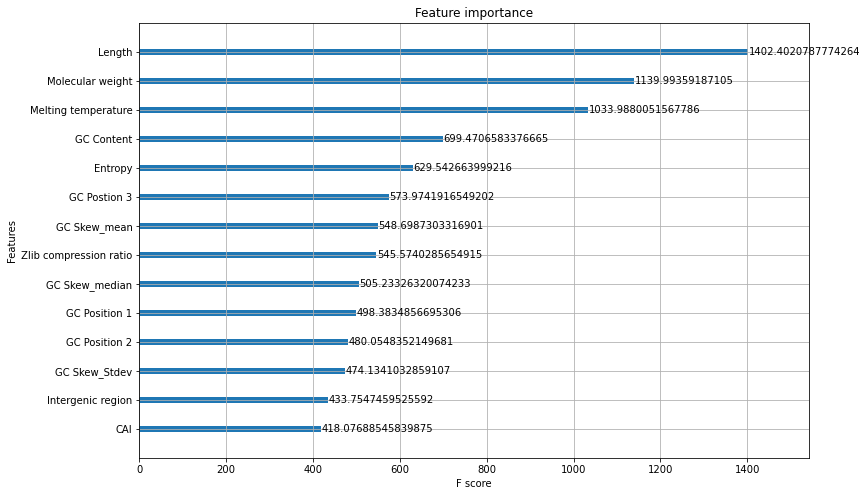

In [8]:
#plot the feature importance plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

plot_importance(model, importance_type = 'cover')
plt.show()

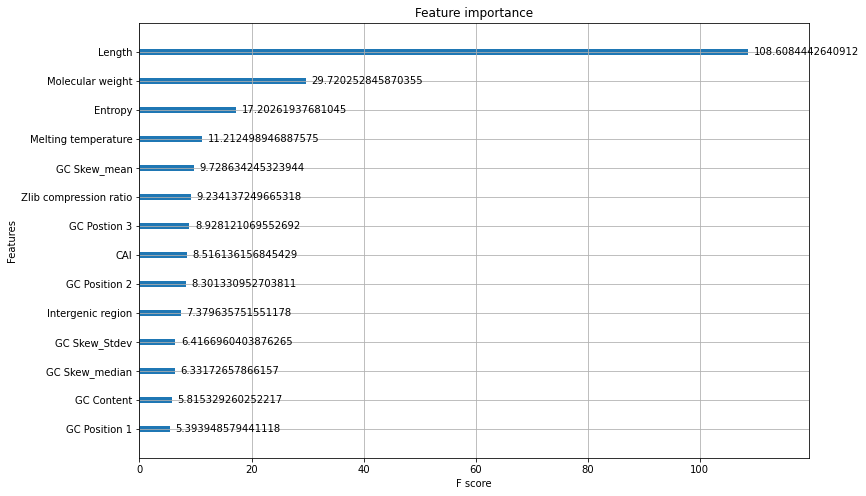

In [9]:
plot_importance(model, importance_type = 'gain')
plt.show()

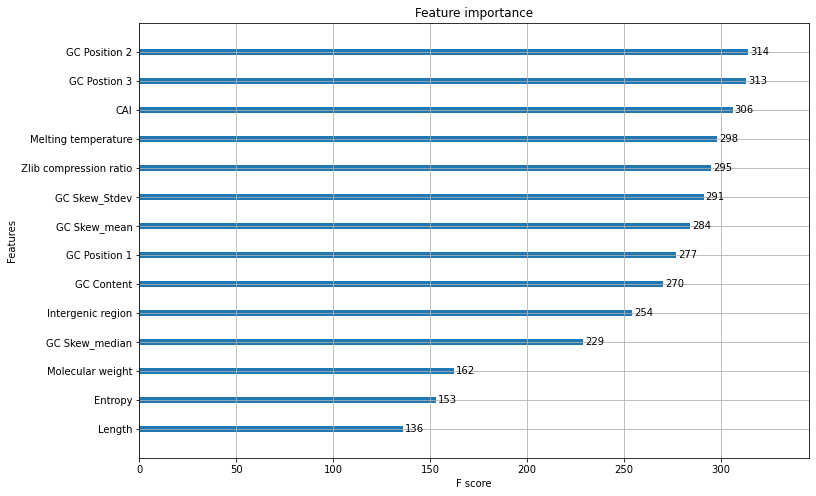

In [10]:
plot_importance(model, importance_type = 'weight')
plt.show()

In [8]:
#explanation plots for feaure importance
import shap
explainer = shap.Explainer(model)
shap_values = explainer(X)

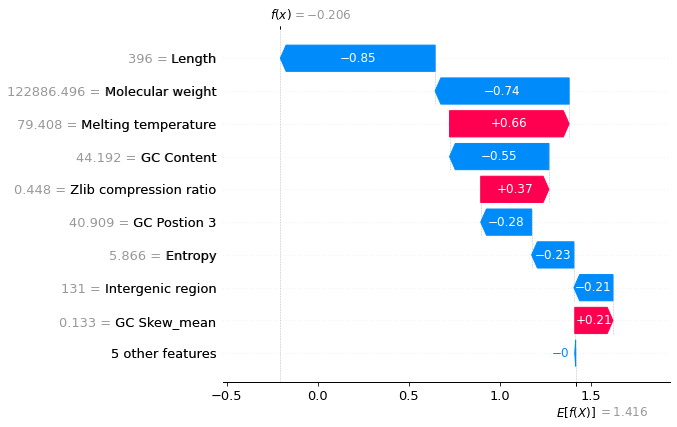

In [9]:
# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[1])

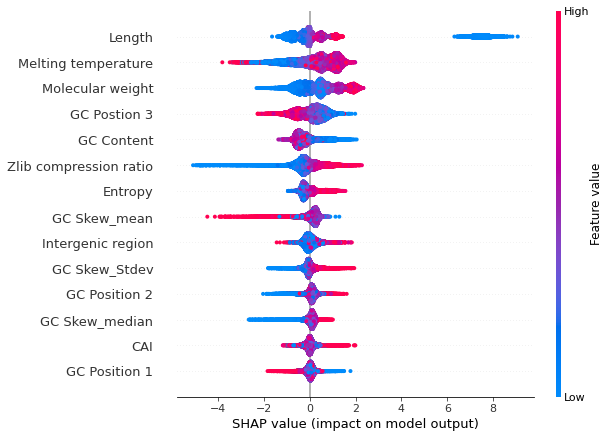

In [10]:
shap.plots.beeswarm(shap_values, max_display=20)

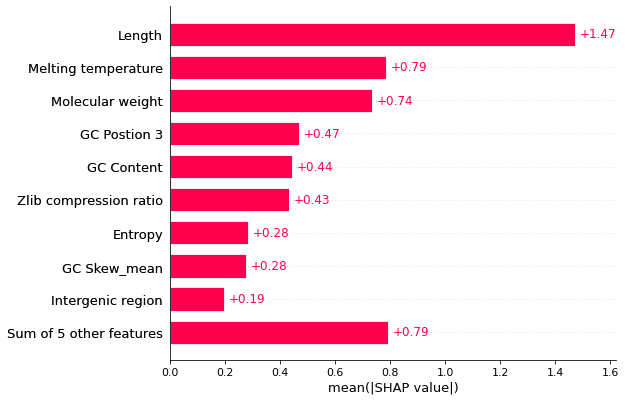

In [11]:
shap.plots.bar(shap_values)

# Optimization

In [107]:
## import statements
import pandas as pd
import numpy as np
import xgboost as xgb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

import skopt
from skopt.searchcv import BayesSearchCV
from skopt.space import Real, Categorical, Integer

In [108]:
#set the parameter space
space ={'learning_rate': Real(0.01, 1.0, 'log-uniform'),
        'min_child_weight': Integer(0, 10),
        'max_depth': Integer(0, 50),
        'max_delta_step': Integer(0, 20),
        'subsample': Real(0.01, 1.0, 'uniform'),
        'colsample_bytree': Real(0.01, 1.0, 'uniform'),
        'colsample_bylevel': Real(0.01, 1.0, 'uniform'),
        'reg_lambda': Real(1e-9, 1000, 'log-uniform'),
        'reg_alpha': Real(1e-9, 1.0, 'log-uniform'),
        'gamma': Real(1e-9, 0.5, 'log-uniform'),
        'min_child_weight': Integer(0, 5),
        'n_estimators': Integer(50, 200),
        'scale_pos_weight': Real(1e-6, 500, 'log-uniform')}

In [109]:
#callback function to be used later which stops parameter search if it goes above 98% to save time
def on_step(optim_result):
    """
    Callback meant to view scores after
    each iteration while performing Bayesian
    Optimization in Skopt"""
    score = xgb_bayes_search.best_score_
    print("best score: %s" % score)
    if score >= 0.98:
        print('Interrupting!')
        return True
    


In [30]:
#Search for best parameters (could take like an hour or so, depending on number of inputs)
xgbcl = xgb.XGBClassifier()

xgb_bayes_search = BayesSearchCV(xgbcl, space, n_iter=32, # specify how many iterations
                                    scoring=None, n_jobs=1, cv=5, verbose=3, random_state=42, n_points=12,
                                 refit=True)

xgb_bayes_search.fit(X_train, y_train.ravel(), callback = on_step)

#prints best parameters
xgb_bayes_search.best_params_

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_delta_step=13, max_depth=21, min_child_weight=2, n_estimators=161, reg_alpha=5.497557739289786e-07, reg_lambda=0.05936070635912049, scale_pos_weight=0.060830282487222144, subsample=0.13556548021189216 
[11:06:48] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV]  colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_delta_step=13, max_depth=21, min_child_weight=2, n_estimators=161, reg_alpha=5.497557739289786e-07, reg_lambda=0.05936070635912049, scale_pos_weight=0.060830282487222144, subsample=0.13556548021189216, score=0.703, total=   1.2s
[CV] colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_delta_step=13, max_depth=21, min_child_weight=2, n_estimators=161, reg_alpha=5.497557739289786e-07, reg_lambda=0.05936070635912049, scale_pos_weight=0.060830282487222144, subsample=0.13556548021189216 
[11:06:49] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like t

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_delta_step=13, max_depth=21, min_child_weight=2, n_estimators=161, reg_alpha=5.497557739289786e-07, reg_lambda=0.05936070635912049, scale_pos_weight=0.060830282487222144, subsample=0.13556548021189216, score=0.713, total=   1.2s
[CV] colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_delta_step=13, max_depth=21, min_child_weight=2, n_estimators=161, reg_alpha=5.497557739289786e-07, reg_lambda=0.05936070635912049, scale_pos_weight=0.060830282487222144, subsample=0.13556548021189216 
[11:06:50] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like t

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.4s remaining:    0.0s


[CV]  colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_delta_step=13, max_depth=21, min_child_weight=2, n_estimators=161, reg_alpha=5.497557739289786e-07, reg_lambda=0.05936070635912049, scale_pos_weight=0.060830282487222144, subsample=0.13556548021189216, score=0.712, total=   1.2s
[CV] colsample_bylevel=0.4160029192647807, colsample_bytree=0.7304484857455519, gamma=0.13031389926541354, learning_rate=0.042815319280763466, max_delta_step=13, max_depth=21, min_child_weight=2, n_estimators=161, reg_alpha=5.497557739289786e-07, reg_lambda=0.05936070635912049, scale_pos_weight=0.060830282487222144, subsample=0.13556548021189216 
[11:06:51] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like t

[CV]  colsample_bylevel=0.25617325301227906, colsample_bytree=0.7083937150495909, gamma=2.41812432168581e-07, learning_rate=0.13965555720269418, max_delta_step=10, max_depth=27, min_child_weight=1, n_estimators=76, reg_alpha=3.178148842971562e-08, reg_lambda=0.005381781269387993, scale_pos_weight=0.23835043249575294, subsample=0.9559763235078597, score=0.848, total=   2.2s
[CV] colsample_bylevel=0.25617325301227906, colsample_bytree=0.7083937150495909, gamma=2.41812432168581e-07, learning_rate=0.13965555720269418, max_delta_step=10, max_depth=27, min_child_weight=1, n_estimators=76, reg_alpha=3.178148842971562e-08, reg_lambda=0.005381781269387993, scale_pos_weight=0.23835043249575294, subsample=0.9559763235078597 
[11:07:39] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to 

[CV]  colsample_bylevel=0.7711308526006485, colsample_bytree=0.07988300914246868, gamma=1.3877597085692663e-08, learning_rate=0.15021004353467043, max_delta_step=6, max_depth=3, min_child_weight=3, n_estimators=77, reg_alpha=0.006097622112520179, reg_lambda=1.9368851099909265e-09, scale_pos_weight=6.97020795804701e-06, subsample=0.46717487628832827, score=0.238, total=   0.3s
[CV] colsample_bylevel=0.7711308526006485, colsample_bytree=0.07988300914246868, gamma=1.3877597085692663e-08, learning_rate=0.15021004353467043, max_delta_step=6, max_depth=3, min_child_weight=3, n_estimators=77, reg_alpha=0.006097622112520179, reg_lambda=1.9368851099909265e-09, scale_pos_weight=6.97020795804701e-06, subsample=0.46717487628832827 
[11:07:49] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd li

[CV]  colsample_bylevel=0.3569079180734289, colsample_bytree=0.1120289995668169, gamma=0.05034432042804318, learning_rate=0.7467518194835729, max_delta_step=7, max_depth=47, min_child_weight=1, n_estimators=67, reg_alpha=0.005500281359785164, reg_lambda=6.3166999939833564e-06, scale_pos_weight=0.4420166988445819, subsample=0.037978567417966985, score=0.757, total=   0.3s
[CV] colsample_bylevel=0.3569079180734289, colsample_bytree=0.1120289995668169, gamma=0.05034432042804318, learning_rate=0.7467518194835729, max_delta_step=7, max_depth=47, min_child_weight=1, n_estimators=67, reg_alpha=0.005500281359785164, reg_lambda=6.3166999939833564e-06, scale_pos_weight=0.4420166988445819, subsample=0.037978567417966985 
[11:07:55] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to rest

[CV]  colsample_bylevel=0.19358622710388942, colsample_bytree=0.9236239290551462, gamma=6.242737149649543e-09, learning_rate=0.5839290998374393, max_delta_step=9, max_depth=2, min_child_weight=1, n_estimators=157, reg_alpha=0.32247446903004606, reg_lambda=5.7439751766594195e-06, scale_pos_weight=1.6287615199535114e-06, subsample=0.9872483677632868, score=0.238, total=   0.3s
[CV] colsample_bylevel=0.19358622710388942, colsample_bytree=0.9236239290551462, gamma=6.242737149649543e-09, learning_rate=0.5839290998374393, max_delta_step=9, max_depth=2, min_child_weight=1, n_estimators=157, reg_alpha=0.32247446903004606, reg_lambda=5.7439751766594195e-06, scale_pos_weight=1.6287615199535114e-06, subsample=0.9872483677632868 
[11:08:02] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like

[CV]  colsample_bylevel=0.06936552953088004, colsample_bytree=0.5708703891954323, gamma=1.9956389638103137e-08, learning_rate=0.09010297955022104, max_delta_step=9, max_depth=25, min_child_weight=2, n_estimators=139, reg_alpha=0.9824119669778386, reg_lambda=0.00017577858139476563, scale_pos_weight=261.4450653749918, subsample=0.14242164035537377, score=0.785, total=   1.8s
[CV] colsample_bylevel=0.06936552953088004, colsample_bytree=0.5708703891954323, gamma=1.9956389638103137e-08, learning_rate=0.09010297955022104, max_delta_step=9, max_depth=25, min_child_weight=2, n_estimators=139, reg_alpha=0.9824119669778386, reg_lambda=0.00017577858139476563, scale_pos_weight=261.4450653749918, subsample=0.14242164035537377 
[11:08:11] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to 

[CV]  colsample_bylevel=0.8477171831834894, colsample_bytree=0.9590782028716157, gamma=0.4419705200245942, learning_rate=0.010068534554171981, max_delta_step=18, max_depth=46, min_child_weight=5, n_estimators=66, reg_alpha=1.3396471230171212e-09, reg_lambda=0.1502689667792386, scale_pos_weight=5.68219069233494e-06, subsample=0.3682037565911086, score=0.238, total=   0.3s
[CV] colsample_bylevel=0.8477171831834894, colsample_bytree=0.9590782028716157, gamma=0.4419705200245942, learning_rate=0.010068534554171981, max_delta_step=18, max_depth=46, min_child_weight=5, n_estimators=66, reg_alpha=1.3396471230171212e-09, reg_lambda=0.1502689667792386, scale_pos_weight=5.68219069233494e-06, subsample=0.3682037565911086 
[11:08:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to rest

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.7min finished


best score: 0.8515037593984962
Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.013696642996184748, max_delta_step=20, max_depth=38, min_child_weight=0, n_estimators=50, reg_alpha=1e-09, reg_lambda=5.8033717468910575e-06, scale_pos_weight=1.2005347096752574, subsample=1.0 
[11:08:35] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV]  colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.013696642996184748, max_delta_step=20, max_depth=38, min_child_weight=0, n_estimators=50, reg_alpha=1e-09, reg_lambda=5.8033717468910575e-06, scale_pos_weight=1.2005347096752574, subsample=1.0, score=0.854, total=   3.5s
[CV] colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.013696642996184748, max_delta_step=20, max_depth=38, min_child_weight=0, n_estimators=50, reg_alpha=1e-09, reg_lambda=5.8033717468910575e-06, scale_pos_weight=1.2005347096752574, subsample=1.0 
[11:08:39] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    3.5s remaining:    0.0s


[CV]  colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.013696642996184748, max_delta_step=20, max_depth=38, min_child_weight=0, n_estimators=50, reg_alpha=1e-09, reg_lambda=5.8033717468910575e-06, scale_pos_weight=1.2005347096752574, subsample=1.0, score=0.858, total=   3.5s
[CV] colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.013696642996184748, max_delta_step=20, max_depth=38, min_child_weight=0, n_estimators=50, reg_alpha=1e-09, reg_lambda=5.8033717468910575e-06, scale_pos_weight=1.2005347096752574, subsample=1.0 
[11:08:42] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.0s remaining:    0.0s


[CV]  colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.013696642996184748, max_delta_step=20, max_depth=38, min_child_weight=0, n_estimators=50, reg_alpha=1e-09, reg_lambda=5.8033717468910575e-06, scale_pos_weight=1.2005347096752574, subsample=1.0, score=0.858, total=   3.5s
[CV] colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.013696642996184748, max_delta_step=20, max_depth=38, min_child_weight=0, n_estimators=50, reg_alpha=1e-09, reg_lambda=5.8033717468910575e-06, scale_pos_weight=1.2005347096752574, subsample=1.0 
[11:08:46] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.013696642996184748, max_delta_step=20, ma

[CV]  colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=1.0, max_delta_step=20, max_depth=50, min_child_weight=0, n_estimators=200, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=1.0, score=0.832, total=   2.5s
[CV] colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=1.0, max_delta_step=20, max_depth=50, min_child_weight=0, n_estimators=200, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=1.0 
[11:09:15] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=1.0, max_delta_step=20, max_depth=50, min_child_weight=0, n_estimators=200, reg_alpha=1e-09, reg_lambda=1e-09

[CV]  colsample_bylevel=0.30119622128128176, colsample_bytree=0.7620317744063955, gamma=1.05618601392427e-05, learning_rate=0.2039500668731053, max_delta_step=8, max_depth=24, min_child_weight=1, n_estimators=81, reg_alpha=1.9555518361939537e-09, reg_lambda=0.2257391035280488, scale_pos_weight=0.5045628850143017, subsample=1.0, score=0.860, total=   2.2s
[CV] colsample_bylevel=0.30119622128128176, colsample_bytree=0.7620317744063955, gamma=1.05618601392427e-05, learning_rate=0.2039500668731053, max_delta_step=8, max_depth=24, min_child_weight=1, n_estimators=81, reg_alpha=1.9555518361939537e-09, reg_lambda=0.2257391035280488, scale_pos_weight=0.5045628850143017, subsample=1.0 
[11:09:29] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsam

[CV]  colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.01, max_delta_step=16, max_depth=44, min_child_weight=0, n_estimators=179, reg_alpha=3.386156528135081e-07, reg_lambda=1e-09, scale_pos_weight=103.01684294548575, subsample=1.0, score=0.850, total=  16.0s
[CV] colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.01, max_delta_step=16, max_depth=44, min_child_weight=0, n_estimators=179, reg_alpha=3.386156528135081e-07, reg_lambda=1e-09, scale_pos_weight=103.01684294548575, subsample=1.0 
[11:10:07] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.01, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.01, max_delta_step=16, max_depth=44, min_child_weight=0, n_estimators=179

[CV]  colsample_bylevel=0.01, colsample_bytree=0.01, gamma=0.49999999999999994, learning_rate=0.01, max_delta_step=20, max_depth=50, min_child_weight=0, n_estimators=50, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.01, score=0.769, total=   0.4s
[CV] colsample_bylevel=0.01, colsample_bytree=0.01, gamma=0.49999999999999994, learning_rate=0.01, max_delta_step=20, max_depth=50, min_child_weight=0, n_estimators=50, reg_alpha=1e-09, reg_lambda=1e-09, scale_pos_weight=499.99999999999994, subsample=0.01 
[11:11:12] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.01, colsample_bytree=0.01, gamma=0.49999999999999994, learning_rate=0.01, max_delta_step=20, max_depth=50, min_child_weight=0, n_e

[CV]  colsample_bylevel=0.01, colsample_bytree=0.962234083225859, gamma=8.552705517701013e-07, learning_rate=0.13113339067886315, max_delta_step=0, max_depth=50, min_child_weight=0, n_estimators=50, reg_alpha=1e-09, reg_lambda=0.004163687156382224, scale_pos_weight=23.519043372736856, subsample=1.0, score=0.848, total=   2.8s
[CV] colsample_bylevel=0.01, colsample_bytree=0.962234083225859, gamma=8.552705517701013e-07, learning_rate=0.13113339067886315, max_delta_step=0, max_depth=50, min_child_weight=0, n_estimators=50, reg_alpha=1e-09, reg_lambda=0.004163687156382224, scale_pos_weight=23.519043372736856, subsample=1.0 
[11:11:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.01, colsample_bytree=0.962234083225859, gamm

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  3.0min finished


best score: 0.8580827067669173
Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] colsample_bylevel=0.9122152721762351, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.14426554399281882, max_delta_step=9, max_depth=36, min_child_weight=0, n_estimators=152, reg_alpha=1e-09, reg_lambda=16.19042158442415, scale_pos_weight=0.3060244467502831, subsample=0.9247961160246149 
[11:11:39] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[CV]  colsample_bylevel=0.9122152721762351, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.14426554399281882, max_delta_step=9, max_depth=36, min_child_weight=0, n_estimators=152, reg_alpha=1e-09, reg_lambda=16.19042158442415, scale_pos_weight=0.3060244467502831, subsample=0.9247961160246149, score=0.854, total=  11.6s
[CV] colsample_bylevel=0.9122152721762351, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.14426554399281882, max_delta_step=9, max_depth=36, min_child_weight=0, n_estimators=152, reg_alpha=1e-09, reg_lambda=16.19042158442415, scale_pos_weight=0.3060244467502831, subsample=0.9247961160246149 
[11:11:51] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   11.6s remaining:    0.0s


[CV]  colsample_bylevel=0.9122152721762351, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.14426554399281882, max_delta_step=9, max_depth=36, min_child_weight=0, n_estimators=152, reg_alpha=1e-09, reg_lambda=16.19042158442415, scale_pos_weight=0.3060244467502831, subsample=0.9247961160246149, score=0.859, total=  12.2s
[CV] colsample_bylevel=0.9122152721762351, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.14426554399281882, max_delta_step=9, max_depth=36, min_child_weight=0, n_estimators=152, reg_alpha=1e-09, reg_lambda=16.19042158442415, scale_pos_weight=0.3060244467502831, subsample=0.9247961160246149 
[11:12:03] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   23.8s remaining:    0.0s


[CV]  colsample_bylevel=0.9122152721762351, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.14426554399281882, max_delta_step=9, max_depth=36, min_child_weight=0, n_estimators=152, reg_alpha=1e-09, reg_lambda=16.19042158442415, scale_pos_weight=0.3060244467502831, subsample=0.9247961160246149, score=0.856, total=  12.1s
[CV] colsample_bylevel=0.9122152721762351, colsample_bytree=1.0, gamma=1e-09, learning_rate=0.14426554399281882, max_delta_step=9, max_depth=36, min_child_weight=0, n_estimators=152, reg_alpha=1e-09, reg_lambda=16.19042158442415, scale_pos_weight=0.3060244467502831, subsample=0.9247961160246149 
[11:12:15] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.9122152721762351, colsample_bytree=1.0, gamma=1e-0

[CV]  colsample_bylevel=1.0, colsample_bytree=1.0, gamma=0.004676108599199854, learning_rate=0.01, max_delta_step=0, max_depth=50, min_child_weight=2, n_estimators=65, reg_alpha=1.087017550744327e-06, reg_lambda=1000.0, scale_pos_weight=2.4281288078813343, subsample=0.2385905237427893, score=0.769, total=   0.7s
[CV] colsample_bylevel=1.0, colsample_bytree=1.0, gamma=0.004676108599199854, learning_rate=0.01, max_delta_step=0, max_depth=50, min_child_weight=2, n_estimators=65, reg_alpha=1.087017550744327e-06, reg_lambda=1000.0, scale_pos_weight=2.4281288078813343, subsample=0.2385905237427893 
[11:12:51] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=1.0, colsample_bytree=1.0, gamma=0.004676108599199854, learning_rate=0.01,

[CV]  colsample_bylevel=0.4019737321218408, colsample_bytree=1.0, gamma=1.8941795397039795e-08, learning_rate=1.0, max_delta_step=0, max_depth=43, min_child_weight=3, n_estimators=200, reg_alpha=1.9099670727042163e-06, reg_lambda=1e-09, scale_pos_weight=14.061197770368228, subsample=0.7135108429622447, score=0.837, total=   3.3s
[CV] colsample_bylevel=0.4019737321218408, colsample_bytree=1.0, gamma=1.8941795397039795e-08, learning_rate=1.0, max_delta_step=0, max_depth=43, min_child_weight=3, n_estimators=200, reg_alpha=1.9099670727042163e-06, reg_lambda=1e-09, scale_pos_weight=14.061197770368228, subsample=0.7135108429622447 
[11:13:20] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=0.4019737321218408, colsample_bytree=1.0

[CV]  colsample_bylevel=1.0, colsample_bytree=0.6372445567928446, gamma=1e-09, learning_rate=0.0729277692600135, max_delta_step=20, max_depth=38, min_child_weight=0, n_estimators=200, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=0.5363537193160919, subsample=1.0, score=0.821, total=   6.4s
[CV] colsample_bylevel=1.0, colsample_bytree=0.6372445567928446, gamma=1e-09, learning_rate=0.0729277692600135, max_delta_step=20, max_depth=38, min_child_weight=0, n_estimators=200, reg_alpha=1e-09, reg_lambda=1000.0, scale_pos_weight=0.5363537193160919, subsample=1.0 
[11:13:44] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV]  colsample_bylevel=1.0, colsample_bytree=0.6372445567928446, gamma=1e-09, learning_rate=0.0729277692600135, max_delta_step=

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  2.7min finished


best score: 0.8588567005749669
[11:14:24] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


OrderedDict([('colsample_bylevel', 0.6282504252278241),
             ('colsample_bytree', 1.0),
             ('gamma', 1e-09),
             ('learning_rate', 0.42226475952791975),
             ('max_delta_step', 5),
             ('max_depth', 45),
             ('min_child_weight', 1),
             ('n_estimators', 119),
             ('reg_alpha', 4.549402233131108e-09),
             ('reg_lambda', 0.1373161505648441),
             ('scale_pos_weight', 0.5355364766388139),
             ('subsample', 1.0)])

In [12]:
#initialise new model with the best parameters, can fit model to data now with this model :)
model = xgb.XGBClassifier(**xgb_bayes_search.best_params_)

NameError: name 'xgb_bayes_search' is not defined

In [110]:
#if not in the same session
#have to define ordered dict to avoid name error
from collections import OrderedDict 
params = OrderedDict([('colsample_bylevel', 0.6282504252278241),
             ('colsample_bytree', 1.0),
             ('gamma', 1e-09),
             ('learning_rate', 0.42226475952791975),
             ('max_delta_step', 5),
             ('max_depth', 45),
             ('min_child_weight', 1),
             ('n_estimators', 119),
             ('reg_alpha', 4.549402233131108e-09),
             ('reg_lambda', 0.1373161505648441),
             ('scale_pos_weight', 0.5355364766388139),
             ('subsample', 1.0)])
model = xgb.XGBClassifier(**params)

In [111]:
#if not in the same session, (not required anymore)
params = {base_score=0.5,booster='gbtree',
              colsample_bylevel=0.6282504252278241, colsample_bynode=1,
              colsample_bytree=1.0, gamma=1e-09, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.42226475952791975, max_delta_step=5, max_depth=45,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=119, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0,
              reg_alpha=4.549402233131108e-09, reg_lambda=0.1373161505648441,
              scale_pos_weight=0.5355364766388139, subsample=1.0,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None}

SyntaxError: invalid syntax (3749871935.py, line 2)

In [33]:
#cross validation works as a way of evaluating performance of the model across different data splits
#eg. Training the model on samples 1-80 and testing on samples 81-100 might give 90% accuracy
# but training the model on samples 21-100 and testing on samples 1-20 might give 80% accuracy
# in this scenario it could leave up to 10% of accuracy up to chance


results = []

#can change n_splits
cv = StratifiedKFold(n_splits=10,shuffle=False)

#use all your data here, it does the train_test_split for you!
for train,test in cv.split(X,Y):
    model.fit(X.iloc[train],Y.iloc[train].ravel())
    y_pred = model.predict(X.iloc[test])
    predictions = [round(value) for value in y_pred]
    #sees how accurate the model was when testing the test set
    accuracy = accuracy_score(Y.iloc[test], predictions)
    pcent = accuracy * 100.0
    print(pcent)
    results.append(pcent)

print("Training Testing Accuracy: %.2f%% (%.2f%%)" % (np.mean(results), np.std(results)))

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].


[11:16:11] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
85.80274214949138
[11:16:19] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
85.97965501990271
[11:16:27] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
85.4046881910659
[11:16:35] WARNING: /tmp/build/80754af9/x

# Explanation for best model

In [23]:
xgb_best = xgb.XGBClassifier(**xgb_bayes_search.best_params_)
xgb_best.fit(X_train, y_train.ravel())

NameError: name 'xgb_bayes_search' is not defined

In [112]:
#if not in the same session
xgb_best = xgb.XGBClassifier(**params)

In [113]:
#if not in the same session
xgb_best.fit(X_train, y_train.ravel())

/home/shriprabha/anaconda3/envs/ML_env/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[11:37:26] WARNING: /tmp/build/80754af9/xgboost-split_1619724447847/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree',
              colsample_bylevel=0.6282504252278241, colsample_bynode=1,
              colsample_bytree=1.0, gamma=1e-09, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.42226475952791975, max_delta_step=5, max_depth=45,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=119, n_jobs=4, num_parallel_tree=1,
              objective='binary:logistic', random_state=0,
              reg_alpha=4.549402233131108e-09, reg_lambda=0.1373161505648441,
              scale_pos_weight=0.5355364766388139, subsample=1.0,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [114]:
y_preds = xgb_best.predict(X_test)
predictions = [round(value) for value in y_preds]


# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 86.72%


# Evaluation Metrics

In [36]:
from sklearn.metrics import f1_score, average_precision_score

f1 = f1_score(y_test, y_preds)
print(f1)

precision = average_precision_score(y_test, y_preds)
print(precision)


0.9132914591004261
0.895068272700562


In [34]:
all_preds = xgb_best.predict(X)

In [58]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, all_preds)

array([[10143,   650],
       [  551, 33876]])

In [59]:
import matplotlib.pyplot as plt

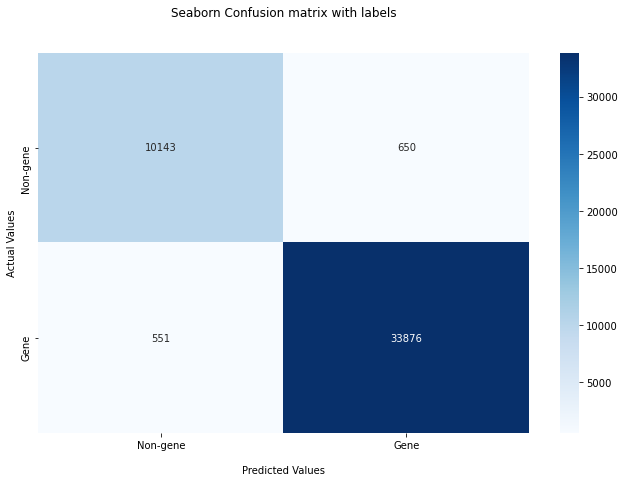

In [115]:
import seaborn as sns
cm = confusion_matrix(Y, all_preds)
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_title('Seaborn Confusion matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['Non-gene','Gene'])
ax.yaxis.set_ticklabels(['Non-gene','Gene'])

plt.rcParams['figure.figsize'] = (11,7)
plt.savefig('cm_ntd.png', dpi=300)

In [39]:
from sklearn.metrics import matthews_corrcoef
print('MCC: %s'%(matthews_corrcoef(Y, all_preds)))

MCC: 0.9267054836989276


In [47]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
probs = xgb_best.predict_proba(X_test)
probs = probs[:, 1]

auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)


AUC: 0.922


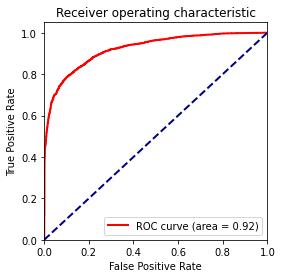

In [57]:
pea_fpr, pea_tpr, pea_thresholds = roc_curve(y_test, probs, 
                                 drop_intermediate = False)

plt.rcParams['figure.figsize'] = (4, 4)

plt.figure()
lw = 2
plt.plot(pea_fpr, pea_tpr, color='red',
         lw=lw, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [55]:
from sklearn.metrics import classification_report

In [56]:
report = classification_report(y_test, y_preds)
print(report)

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      2168
           1       0.91      0.92      0.91      6876

    accuracy                           0.87      9044
   macro avg       0.82      0.81      0.81      9044
weighted avg       0.87      0.87      0.87      9044



In [40]:
explainer = shap.Explainer(xgb_best)
shap_values = explainer(X_train)

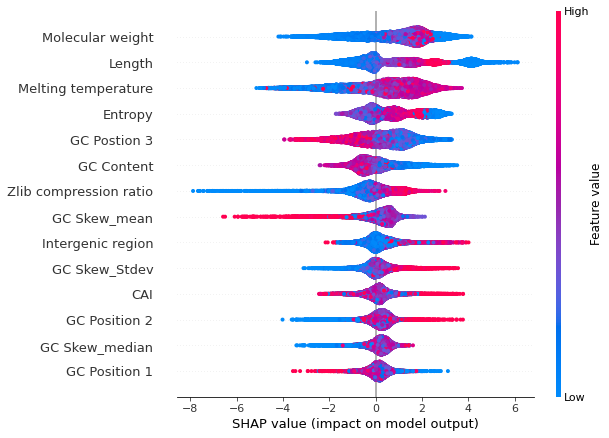

In [41]:
shap.plots.beeswarm(shap_values, max_display=20)

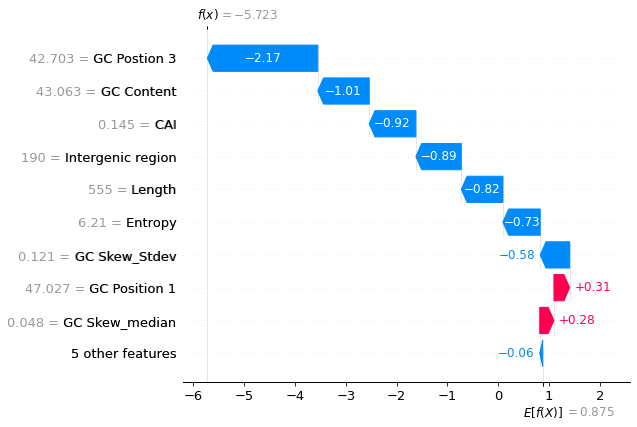

In [42]:
shap.plots.waterfall(shap_values[1])

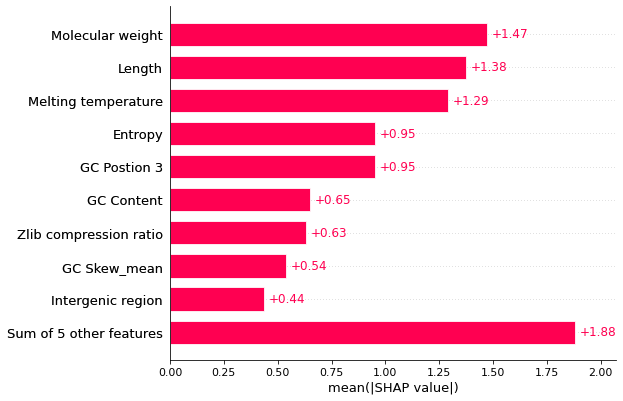

In [43]:
shap.plots.bar(shap_values)

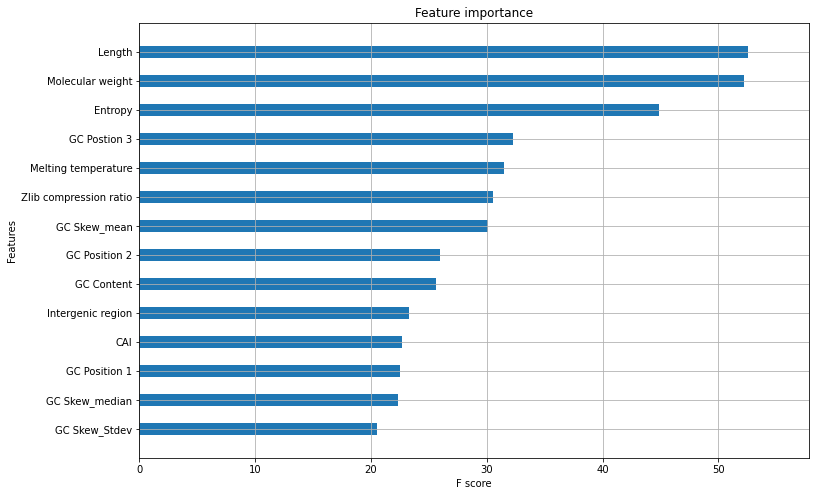

In [44]:
#plot the feature importance plots
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]

plot_importance(xgb_best, importance_type = 'cover', show_values = False, height=0.4, max_num_features = 20)
plt.show()

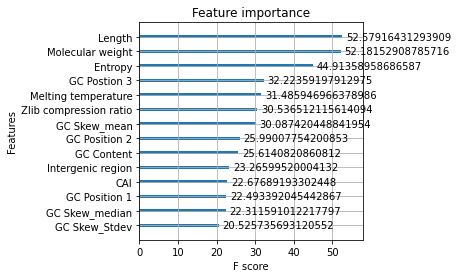

In [50]:
plot_importance(xgb_best, importance_type = 'cover', max_num_features = 25)
plt.show()

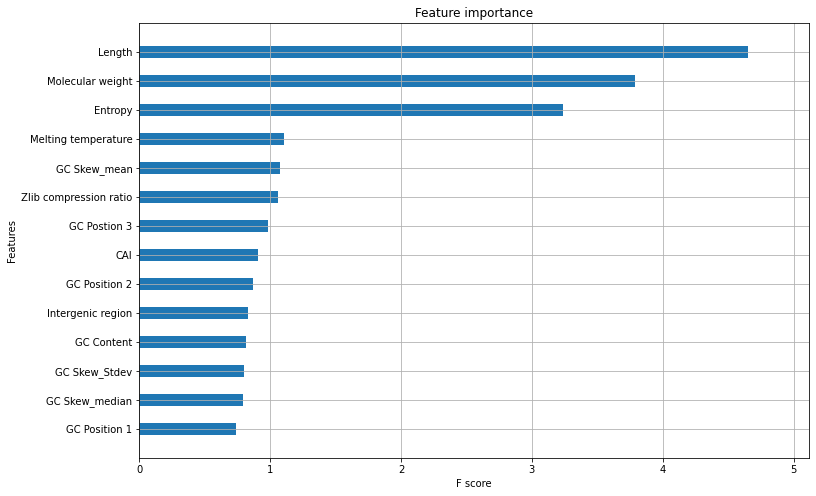

In [45]:
plot_importance(xgb_best, importance_type = 'gain', show_values = False, height=0.4, max_num_features = 20)
plt.show()

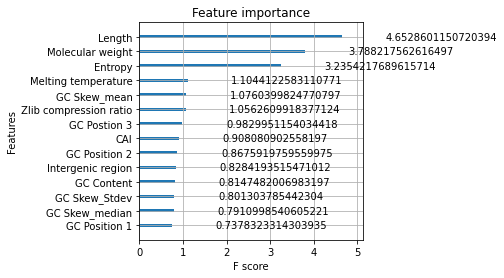

In [51]:
plot_importance(xgb_best, importance_type = 'gain', max_num_features = 20)
plt.show()

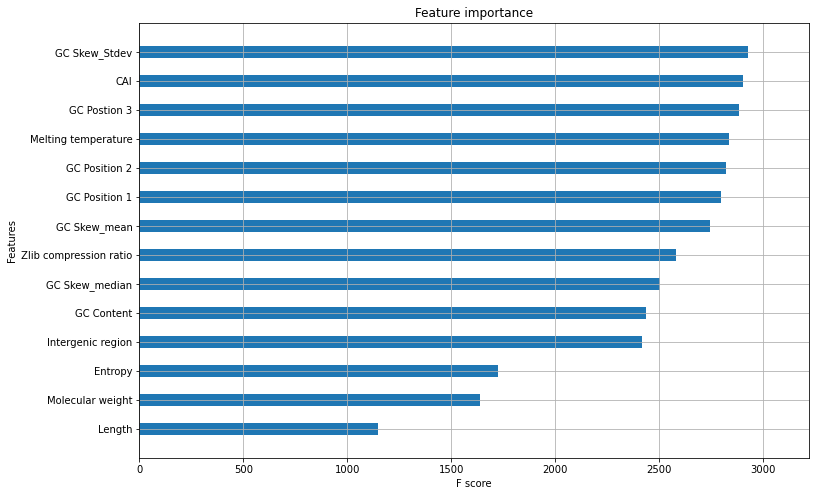

In [46]:
plot_importance(xgb_best, importance_type = 'weight', show_values = False, height=0.4, max_num_features = 20)
plt.show()

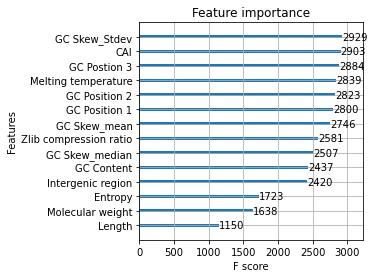

In [52]:
plot_importance(xgb_best, importance_type = 'weight', max_num_features = 20)
plt.show()